In [1]:
# Example usage of windaq.py

# Import the library, if file is not within the same directory as your script use sys.path.append()
import windaq as wdq

# Path to sample windaq file, this is one of the sample files provided by Dataq when Windaq Waveform Browser is installed
f = 'AUTO.WDQ'

# Open file
wfile = wdq.windaq(f)

In [2]:
# Get the first channel of data
ch1 = wfile.data(1)      # channel indexing starts at 1
for d in ch1[0:10]:
    print(d)

-0.4244375703037164
0.06287964004499713
-0.20435883014622647
-0.14147919010122934
-0.015719910011249283
0.06287964004499713
-0.1729190101237279
-0.3772778402699615
-0.15719910011248572
0.015719910011249283


In [3]:
# Get the relative time
tdata = wfile.time()
for t in tdata[0:10]:
    print(t)

0.0
0.10666666666666667
0.21333333333333335
0.32
0.4266666666666667
0.5333333333333333
0.64
0.7466666666666667
0.8533333333333334
0.9600000000000001


In [4]:
# Get UTC time
utc_data = wfile.time_utc()
for utc in utc_data[0:10]:
    print(utc)

1990-08-10T15:45:35.000000000
1990-08-10T15:45:35.106666666
1990-08-10T15:45:35.213333333
1990-08-10T15:45:35.320000000
1990-08-10T15:45:35.426666666
1990-08-10T15:45:35.533333333
1990-08-10T15:45:35.640000000
1990-08-10T15:45:35.746666666
1990-08-10T15:45:35.853333333
1990-08-10T15:45:35.960000000


In [5]:
# Get channel 1 user annotation
print(wfile.chAnnotation(1))
# Get channel 1 units
print(wfile.unit(1))

DUTY CYCLE
%     


In [6]:
# Read all data into a pandas Dataframe, this is my prefered way of working with data
import pandas as pd
df = pd.DataFrame({'time':               wfile.time(),
                   'duty_cycle':         wfile.data(1),
                   'gear_position':      wfile.data(2),
                   'drive_shaft_torque': wfile.data(3),
                   'vehicle_speed':      wfile.data(4),
                   'engine_speed':       wfile.data(5),
                   'turbine_speed':      wfile.data(6)})

print(df.head())

       time  duty_cycle  gear_position  drive_shaft_torque  vehicle_speed  \
0  0.000000   -0.424438       3.734131          -29.989403      24.750000   
1  0.106667    0.062880       3.723145          -27.621818      24.300584   
2  0.213333   -0.204359       3.754883          -28.805610      24.428988   
3  0.320000   -0.141479       3.731689          -29.594805      24.396887   
4  0.426667   -0.015720       3.748779          -28.805610      24.300584   

   engine_speed  turbine_speed  
0      941.7216    1153.948744  
1      912.4352    1130.540704  
2      903.4240    1116.495879  
3      887.6544    1102.451055  
4      873.0112    1083.724623  


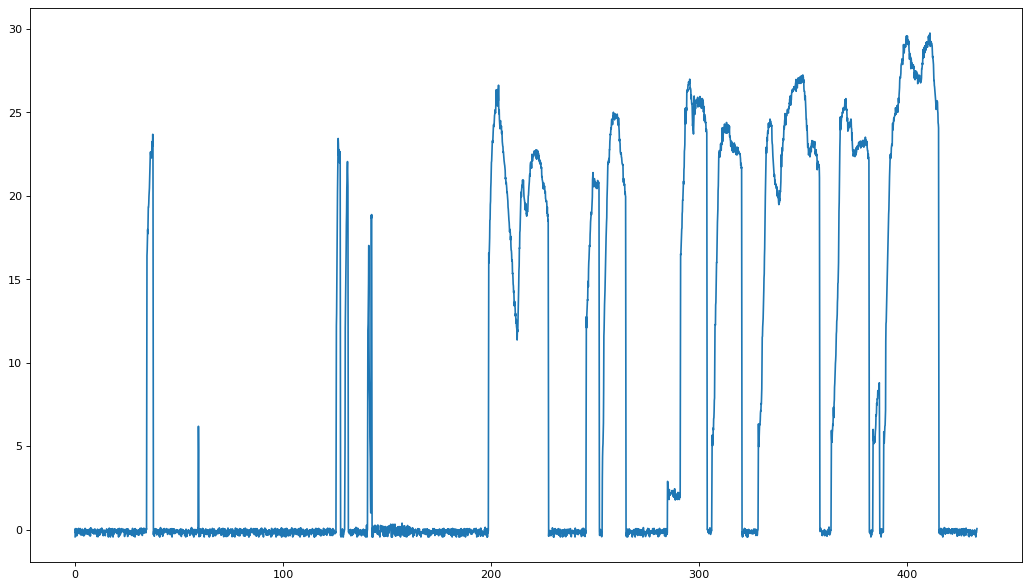

In [7]:
# Lets Plot it to make sure it looks like what Windaq Waveform Browser Shows
import matplotlib.pyplot as plt
fig = plt.figure(num=1, figsize=(16,9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['time'], df['duty_cycle'], label='Duty Cycle')
plt.show()